In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
train_scaled.shape

(48000, 28, 28, 1)

cnn 설계

In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

pooling 추가

In [4]:
model.add(keras.layers.MaxPooling2D(2))

layer추가

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

FC layer로 연결

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [8]:
!pip install pydot  

In [9]:
!pip install graphviz

여기 하다가 안되서 블로그 참조 했음

참조 블로그 : https://twinstarinfo.blogspot.com/2019/05/pydot-install.html

conda command에서 conda install pydot, conda install graphviz 두개 실행했음

In [10]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


아래 코드로 진행해도 같은 결과가 나옴

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [12]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-acrhitecture.png', dpi=300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
# 모델 컴파일과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 34s 22ms/step - loss: 0.5387 - accuracy: 0.8094 - val_loss: 0.3370 - val_accuracy: 0.8741
Epoch 2/20
1500/1500 [==============================] - 32s 22ms/step - loss: 0.3553 - accuracy: 0.8737 - val_loss: 0.2787 - val_accuracy: 0.8955
Epoch 3/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.3058 - accuracy: 0.8913 - val_loss: 0.2648 - val_accuracy: 0.9032
Epoch 4/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.2709 - accuracy: 0.9032 - val_loss: 0.2507 - val_accuracy: 0.9091
Epoch 5/20
1500/1500 [==============================] - 32s 22ms/step - loss: 0.2498 - accuracy: 0.9095 - val_loss: 0.2467 - val_accuracy: 0.9099
Epoch 6/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2273 - accuracy: 0.9171 - val_loss: 0.2301 - val_accuracy: 0.9162
Epoch 7/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2116 - accuracy: 0.9232 - val_loss: 0.2256 -

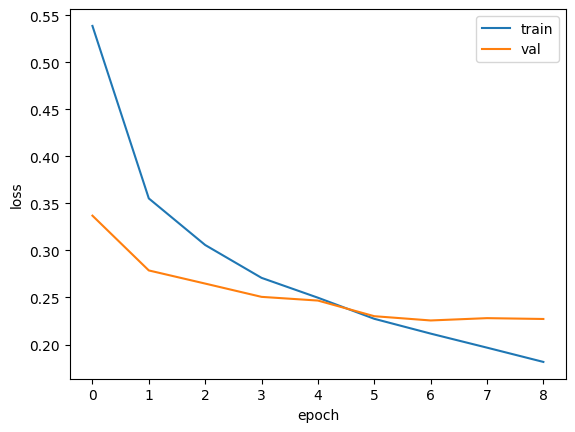

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2256 - accuracy: 0.9156


[0.22556646168231964, 0.9155833125114441]

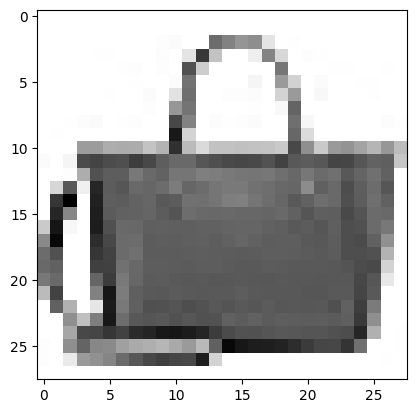

In [16]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')

val_scaled[0:1]와 val_scaled[0]은 다르다?

In [23]:
print(val_scaled[0:1].shape)

(1, 28, 28, 1)


In [24]:
print(val_scaled[0].shape)

(28, 28, 1)


In [17]:
preds= model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 104ms/step
[[4.0723980e-15 8.0890974e-26 3.0731686e-19 5.7905724e-19 1.0241747e-16
  5.1703623e-18 5.2229170e-17 1.1824259e-15 1.0000000e+00 1.7549064e-16]]


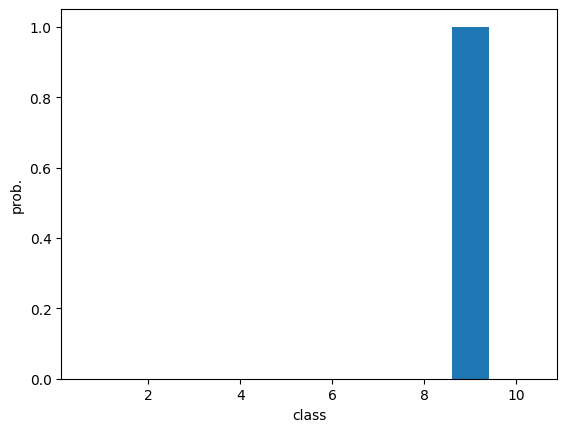

In [21]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [22]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [25]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [26]:
test_scaled = test_input.reshape(-1,28,28,1) / 255.0

In [27]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 6ms/step - loss: 0.2491 - accuracy: 0.9106


[0.2490682601928711, 0.9106000065803528]